# Extreme Heat in Los Angeles 
The City of Los Angeles has experienced a record breaking heatwave in the summer of 2022. This caused an increase in heat related illness, power shutoffs, and extended prolonged exposure to sweltering temperatures up to 115 degrees fahrenheit in some areas. After this event, questions were raised on how the most vulnerable communities will be able to combat climate change, specifically heat waves. Our group will first identify which areas within the City of Los Angeles will experience increased heat days above 90F between the years 2035 and 2064. These projections will help understand which communities will be impacted the most and if they are prepared in terms of emergency response center, cooling centers, and transit shelters. We aim to understand what communties are have these three essential resources and the demographics of those communities that will be impacted the most in the future by current projection data provided by the California Healthy Places Index.

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

#folium map 
import folium 
import json

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Data Set for heat days above 90F in LA County
heat=pd.read_csv(
    'Heat_W7.csv',
    dtype=
    {'FIPS':str,
     'GEOID':str,
    }
)
heat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tract       2261 non-null   float64
 1   heat_days   2261 non-null   float64
 2   FIPS        2261 non-null   object 
 3   GEOID       2261 non-null   object 
 4   heat_bin    2261 non-null   int64  
 5   heat_label  2261 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 106.1+ KB


In [4]:
heat.head()

Tract  heat_days        FIPS        GEOID  heat_bin   heat_label
0  5990.00   2.416667  6037599000  06037599000         1  less tha 25
1  2742.02   3.275000  6037274202  06037274202         1  less tha 25
2  2734.02   3.275000  6037273402  06037273402         1  less tha 25
3  2738.00   3.275000  6037273800  06037273800         1  less tha 25
4  2741.00   3.275000  6037274100  06037274100         1  less tha 25

In [5]:
column=list(heat)
column

['Tract', 'heat_days', 'FIPS', 'GEOID', 'heat_bin', 'heat_label']

In [6]:
heat.columns=['Tract', 'Heat Days', 'FIPS', 'GEOID', 'heat_bin', 'heat_label']

In [7]:
#Geopandas data for LA County Census Tracts
tracts=gpd.read_file('06.geojson')

In [8]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   8057 non-null   object  
 1   COUNTYFP  8057 non-null   object  
 2   TRACTCE   8057 non-null   object  
 3   GEOID     8057 non-null   object  
 4   NAME      8057 non-null   object  
 5   NAMELSAD  8057 non-null   object  
 6   MTFCC     8057 non-null   object  
 7   FUNCSTAT  8057 non-null   object  
 8   ALAND     8057 non-null   float64 
 9   AWATER    8057 non-null   float64 
 10  INTPTLAT  8057 non-null   object  
 11  INTPTLON  8057 non-null   object  
 12  geometry  8057 non-null   geometry
dtypes: float64(2), geometry(1), object(10)
memory usage: 818.4+ KB


In [9]:
#Need to trim down the Census Tracts. This is from 2018 data since the Heat data sources 
#are from 2018. The CHPI only has up to 2018. 
tracts1=tracts[['GEOID','geometry']]

In [10]:
heat_merged=tracts1.merge(heat,on="GEOID")
heat_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2261 entries, 0 to 2260
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEOID       2261 non-null   object  
 1   geometry    2261 non-null   geometry
 2   Tract       2261 non-null   float64 
 3   Heat Days   2261 non-null   float64 
 4   FIPS        2261 non-null   object  
 5   heat_bin    2261 non-null   int64   
 6   heat_label  2261 non-null   object  
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 141.3+ KB


<AxesSubplot: >

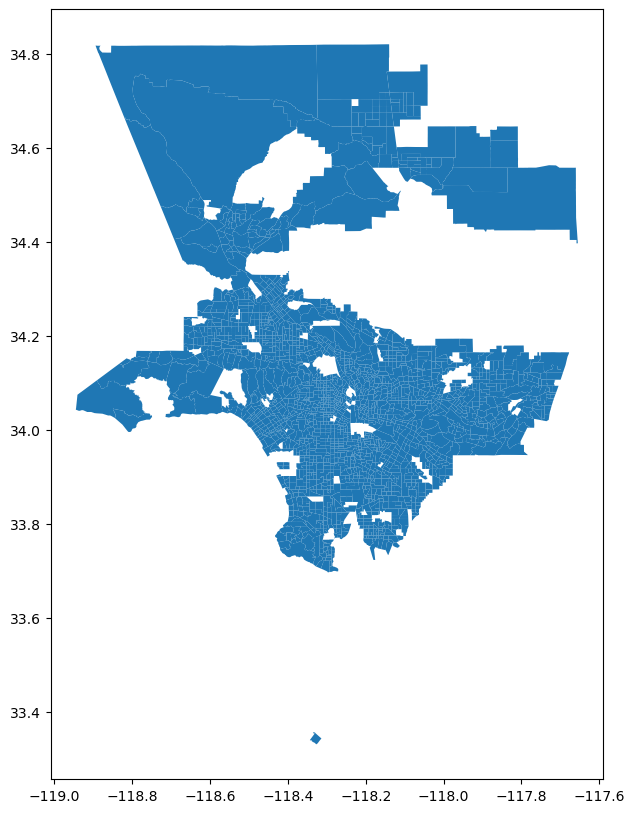

In [11]:
heat_merged.plot (figsize=(12,10))

To best understand the effects heat will have in Los Angeles, we must first understand the projected outcomes. The California Healthy Places Index Heat Edition[^1] was developed by the Public Health Alliance of Southern California in partnership with the UCLA Luskin Center for Innovation. This tool projects exposure to heat in terms of days above 90F and/or 100F between the years 2035-2064 and beyond. The base map derives from the Healthy Places Index which utilizes place-based indicators to determine potential environemtnal variables that could affect public health and assigning a helath index to each location. For the purpose of this notebook, we will look at days above 90F between the years 2035-2064. The collowing map projects which census tracts will experience extreme days in the future. However, this map does not accurately asses the days in equal intervals since the geopandas package splits our days into quantiles. We can begin to see that areas closer to the coast are coller than those in arid regions. Althoug this project wil concetrate on the City of Los Angeles, the County overview gives a better understaning of how extensive this problem is.
[^1]https://heat.healthyplacesindex.org/

<AxesSubplot: >

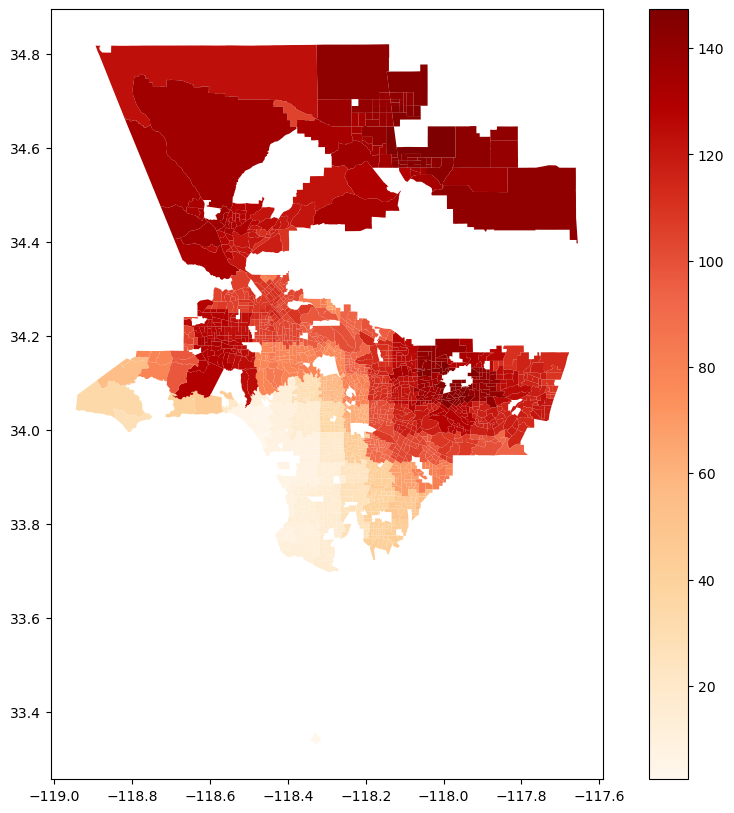

In [12]:
heat_merged.plot(figsize=(12,10),
                 column='Heat Days',
                 cmap='OrRd',
                 legend=True
                )

In [13]:
heat_merged['Heat Days']=heat_merged['Heat Days'].astype(int)
heat_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2261 entries, 0 to 2260
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEOID       2261 non-null   object  
 1   geometry    2261 non-null   geometry
 2   Tract       2261 non-null   float64 
 3   Heat Days   2261 non-null   int64   
 4   FIPS        2261 non-null   object  
 5   heat_bin    2261 non-null   int64   
 6   heat_label  2261 non-null   object  
dtypes: float64(1), geometry(1), int64(2), object(3)
memory usage: 141.3+ KB


In [14]:
city=gpd.read_file('City_Boundary.geojson')

In [15]:
heat_clip=gpd.clip(heat_merged,city)
heat_clip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1113 entries, 1335 to 450
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEOID       1113 non-null   object  
 1   geometry    1113 non-null   geometry
 2   Tract       1113 non-null   float64 
 3   Heat Days   1113 non-null   int64   
 4   FIPS        1113 non-null   object  
 5   heat_bin    1113 non-null   int64   
 6   heat_label  1113 non-null   object  
dtypes: float64(1), geometry(1), int64(2), object(3)
memory usage: 69.6+ KB


/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [16]:
bins=([0,25,50,75,100,125,150])

In [65]:
m=folium.Map(location=[34,-118.3], 
               zoom_start = 9.5,
               tiles='CartoDB positron', 
               attribution='CartoDB')

style1 = {'fillOpacity':'0.0', 
          'stroke':True,
          'weight':'3'}

folium.GeoJson('City_Boundary.geojson',   
               highlight_function=None, 
               style_function=lambda x:style1,
               name="City", 
               overlay=True, 
               control=True, 
               show=False, 
               smooth_factor=None, 
               tooltip=None, 
               embed=True, 
               popup=None, 
               zoom_on_click=True, 
               marker=None
              ).add_to(m)

heat_clip.explore(m=m,
    column='Heat Days',
    cmap='YlOrRd',
    tiles="CartoDB positron",
    tooltip=False,
    popup='Heat Days',  
    highlight=True,
    categorical=False,
    legend=True,
                  
    legend_kwds=dict(caption='Days above 90F between 2035-2064',
                    scale=True,
                    colorbar=True),
                  
    style_kwds=dict(stroke=True,
                   color='black',
                   weight=0.8,
                   fill=True,
                   fillOpacity=0.8),
    name="Heat Days",
    control_scale=True)

folium.LayerControl().add_to(m)
m

After using the folium library, we create a more interactive map into intervals of 25 days up to a maximum of 175 days. This map shows that the further we move away from our pacific coast, the hotter a census tract becomes. The hottesst areas are typically in valley and arid regions such as the San Fernando Valley, Santa Clarita, and the Palmdale/Lancaster region. These locations are all within the 125 to 150 day bin meaning these locations will experience more than 100 heat days that are above 90F. Even in areas within Downtown Los Angeles, these tracts will experience at least 50 to 100 days above 90F.

In [43]:
m.save('Heat In LA.html')

In [16]:
heat_sorted=m_heat.sort_values(by='Days above 90F',ascending = False)
list(heat_sorted.head(10)['Census Tract'])

[4311.0,
 4307.24,
 4067.02,
 9102.01,
 9101.01,
 9005.08,
 4318.0,
 4044.02,
 4053.02,
 4053.01]

In [ ]:
top_heat=heat_sorted.head(10)

To get a better understanding of this intense heat I created bar grpahs to see what areas will expereince the most and lowest heat days. There are at least 10 census tracts that will experience at least 145 to 147 days above 90F. The tract with the most days is Monrovia. The city with the lowest days is Venice and coastal regions. These areas will experience at most 2 to 4 days above 90F. This really illustrates the variation among heat across the overall county and especially in arid regions with very little shade. Although this inital observation shows how extreme heat can be, there are other variabels to consider. Certain communities are more vulnerable to heat and will experience the personal health effects differently across the county. Therfore, to better understand what vulnerable communities exist and how well equipped they in terms of resiliene, we look at demographi variables in the next notebooks and also analyze the frequency of cooling centers, hospitals, and bus shelters in the city

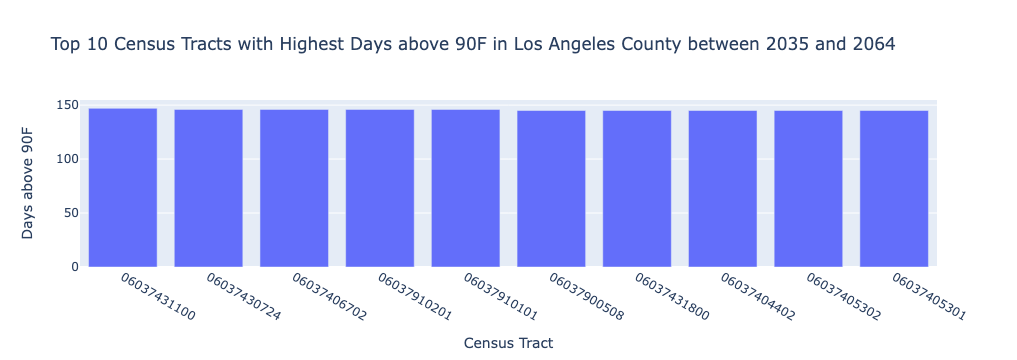

In [18]:
fig1=px.bar(top_heat,
            x='GEOID',
            y='Days above 90F',
            title='Top 10 Census Tracts with Highest Days above 90F in Los Angeles County between 2035 and 2064',
            labels={
            'GEOID':'Census Tract'}
           )
fig1.show()

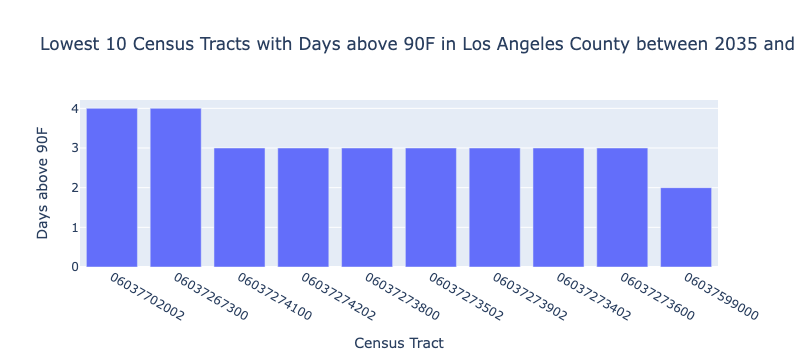

In [19]:
low_heat=heat_sorted.tail(10)
fig2=px.bar(low_heat,
               x='GEOID',
               y='Days above 90F',
               title='Lowest 10 Census Tracts with Days above 90F in Los Angeles County between 2035 and 2064',
            labels={
            'GEOID':'Census Tract'}
           )
fig2.show()

In [20]:
list(top_heat['geometry'])

[<POLYGON ((-118.005 34.146, -118.003 34.146, -118.003 34.146, -118.002 34.14...>,
 <POLYGON ((-118.068 34.124, -118.068 34.125, -118.068 34.125, -118.067 34.12...>,
 <POLYGON ((-117.951 34.065, -117.951 34.065, -117.95 34.065, -117.95 34.065,...>,
 <POLYGON ((-118.148 34.613, -118.148 34.613, -118.148 34.613, -118.148 34.61...>,
 <POLYGON ((-118.121 34.602, -118.12 34.602, -118.119 34.602, -118.117 34.602...>,
 <POLYGON ((-118.077 34.69, -118.073 34.69, -118.073 34.69, -118.071 34.69, -...>,
 <POLYGON ((-118.068 34.124, -118.068 34.124, -118.068 34.124, -118.068 34.12...>,
 <POLYGON ((-117.938 34.115, -117.938 34.115, -117.938 34.118, -117.938 34.11...>,
 <POLYGON ((-117.958 34.074, -117.958 34.074, -117.958 34.074, -117.957 34.07...>,
 <POLYGON ((-117.949 34.091, -117.949 34.092, -117.949 34.092, -117.947 34.09...>]

# Contribution 
My contribution was mainly focused on establishing the heat data and projections that will shape the rest of our project and narrative. I was tasked with retrieving and cleaning all the heat data from the CHPI. I downloaded and cleaned the CSV file into its correct heat days and then merged this data with 2018 American Community Survey Census Tracts. I then created the interactive follium map that will serve as the base map for the rest of our project. The bar graphs were descriptives for our group to understand the heat variation across the county. Though not here in our notebook, I desinged the google website where we host our HTML interactive deliverables for useage later as we continue the project. Here is our Google Site [Link](https://sites.google.com/g.ucla.edu/heatmap/home) 